In [1]:

%matplotlib inline
import sys
sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
import mpmath

from synthetic.generate import SingleTaskTreeDepsGenerator
from metal.label_model import LabelModel
from metal.label_model.utils import (
    compute_mu,
    compute_covariance,
    compute_inv_covariance,
    print_matrix,
    visualize_matrix
)

/lfs/1/annhe/anaconda3/envs/metal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Generate synthetic dataset using the deterministic edge function
np.random.seed(1)
N = 50
M = 5
K = 2
edges_list = []
#edges_list.append((3,1))
edges_list.append((1,3))
#edges_list.append((2,1))
data = SingleTaskTreeDepsGenerator(N, M, k=K, edge_prob=1.0, edges_list=edges_list)


(0, 1)   [0.22596951 0.81316323]
(0, 2)   [0.12682122 0.89481293]
(1, 1)   [0.58670937 0.50318216]
(1, 2)   [0.90292228 0.43982591]
(2, 1)   [0.58458222 0.68706899]
(2, 2)   [0.42513492 0.61390771]
(3, 1)   [0.67405284 0.2136834 ]
(3, 2)   [0.72118413 0.68297446]
(4, 1)   [0.41854518 0.78690975]
(4, 2)   [0.42087855 0.77750952]
((0, 1), 1, 1)   [0.27626837 0.10233384]
((0, 1), 1, 2)   [0.19962181 0.1147584 ]
((0, 1), 2, 1)   [0.25739029 0.11281347]
((0, 1), 2, 2)   [0.17106207 0.28836739]
((1, 2), 1, 1)   [0.17596066 0.25258401]
((1, 2), 1, 2)   [0.254319  0.1602721]
((1, 2), 2, 1)   [0.25454783 0.13058596]
((1, 2), 2, 2)   [0.21572679 0.1018016 ]
((0, 3), 1, 1)   [0.2418085  0.19412816]
((0, 3), 1, 2)   [0.25291851 0.19347854]
((0, 3), 2, 1)   [0.15380021 0.26633852]
((0, 3), 2, 2)   [0.21026499 0.1140163 ]
((1, 4), 1, 1)   [0.19449501 0.24855297]
((1, 4), 1, 2)   [0.13839122 0.1928623 ]
((1, 4), 2, 1)   [0.14607256 0.20164951]
((1, 4), 2, 2)   [0.14171366 0.10986085]
((1, 3), 1, 1)  

P(L_ 0 = 1 , L_ 2 = 0  | Y =  2 ) =  0.07413238671647789
P(L_ 0 = 1 , L_ 2 = 1  | Y =  2 ) =  0.17321085616496998
P(L_ 0 = 1 , L_ 2 = 2  | Y =  2 ) =  0.15269426756601687
P(L_ 0 = 2 , L_ 2 = 0  | Y =  2 ) =  0.08537840030274856
P(L_ 0 = 2 , L_ 2 = 1  | Y =  2 ) =  0.1991562613451397
P(L_ 0 = 2 , L_ 2 = 2  | Y =  2 ) =  0.175815820747467
Labelers =  (0, 3)
P(L_ 0 = 0 , L_ 3 = 0  | Y =  2 ) =  0.03309919294199385
P(L_ 0 = 0 , L_ 3 = 1  | Y =  2 ) =  0.04098443236594585
P(L_ 0 = 0 , L_ 3 = 2  | Y =  2 ) =  0.06552838184924027
P(L_ 0 = 1 , L_ 3 = 0  | Y =  2 ) =  0.08154233776140099
P(L_ 0 = 1 , L_ 3 = 1  | Y =  2 ) =  0.12260084614749588
P(L_ 0 = 1 , L_ 3 = 2  | Y =  2 ) =  0.19589432653856792
P(L_ 0 = 2 , L_ 3 = 0  | Y =  2 ) =  0.09521281196809131
P(L_ 0 = 2 , L_ 3 = 1  | Y =  2 ) =  0.1538743602007994
P(L_ 0 = 2 , L_ 3 = 2  | Y =  2 ) =  0.21126331022646455
Labelers =  (0, 4)
P(L_ 0 = 0 , L_ 4 = 0  | Y =  2 ) =  0.022890221233374357
P(L_ 0 = 0 , L_ 4 = 1  | Y =  2 ) =  0.06034661464799

In [3]:
print(data.sig_inv)

[[ 7.22410619  4.84413872  1.13066935  1.21862905  0.8811854   0.88106349
   0.78579144  0.75695875  0.81483122  0.8220308 ]
 [ 4.85836628  7.54643956  0.84330628  0.89708206  0.70278792  0.70153036
   0.8469022   0.8244728   0.64939127  0.65568775]
 [ 0.03564063  0.03373849 10.27809407  7.7779124  -0.52872645 -0.56462903
   0.38461015  0.38752862 -0.52682591 -0.46931468]
 [ 0.08835796  0.05496794  7.77836256  9.94082172 -0.56056009 -0.51734393
   0.22414096  0.24442283 -0.47454555 -0.4501252 ]
 [-0.24464148 -0.2546477  -0.6022195  -0.63680146  7.26447183  4.92037287
  -0.31332459 -0.32119445 -0.2565221  -0.25766855]
 [-0.24552016 -0.25662162 -0.63809066 -0.59355469  4.92040748  7.62454713
  -0.30865814 -0.31682084 -0.25726026 -0.2578973 ]
 [ 0.0548294   0.10113072  0.27589026  0.28123118  0.29957694  0.29991198
   8.34763426  5.74328279  0.28022096  0.28208557]
 [-0.07661385 -0.02882277  0.31144279  0.3287198   0.30263311  0.30249664
   5.72639711  8.00514173  0.27823739  0.28106245]


[(0, 1), (1, 2), (0, 3), (1, 4), (1, 3)]


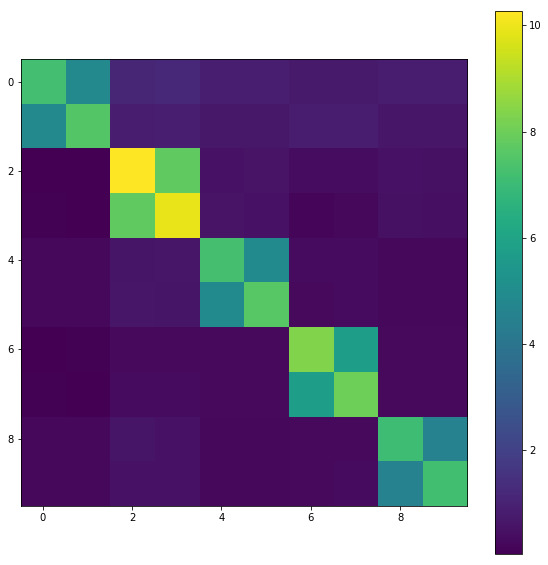

In [4]:
print(data.E)
visualize_matrix(np.abs(data.sig_inv))

In [5]:
# Generate synthetic dataset
np.random.seed(1)
N = 50
M = 5
K = 2
EDGE_PROB=1.0
data = SingleTaskTreeDepsGenerator(N, M, k=K, edge_prob=EDGE_PROB)

(0, 1)   [0.44911967 0.70277143]
(0, 2)   [0.94198516 0.86167983]
(1, 1)   [0.38194617 0.57209334]
(1, 2)   [0.4991076  0.30661949]
(2, 1)   [0.58097252 0.92256582]
(2, 2)   [0.51148433 0.48762871]
(3, 1)   [0.94521501 0.80055031]
(3, 2)   [0.74437346 0.82248175]
(4, 1)   [0.18352073 0.56633729]
(4, 2)   [0.87851823 0.84623222]
((0, 1), 1, 1)   [0.26592067 0.15460999]
((0, 1), 1, 2)   [0.11184864 0.23410561]
((0, 1), 2, 1)   [0.2186131  0.23433082]
((0, 1), 2, 2)   [0.18235758 0.13951018]
((1, 2), 1, 1)   [0.15792593 0.12842403]
((1, 2), 1, 2)   [0.25666289 0.18250777]
((1, 2), 2, 1)   [0.10683426 0.224806  ]
((1, 2), 2, 2)   [0.23212715 0.15969906]
((0, 3), 1, 1)   [0.1892269  0.14442491]
((0, 3), 1, 2)   [0.11467283 0.19384771]
((0, 3), 2, 1)   [0.11923445 0.28067403]
((0, 3), 2, 2)   [0.12389809 0.20495988]
((0, 4), 1, 1)   [0.1167246  0.28337227]
((0, 4), 1, 2)   [0.28208968 0.15978602]
((0, 4), 2, 1)   [0.21687782 0.21318241]
((0, 4), 2, 2)   [0.22278766 0.29130713]
Labeler =  0
i

P(L_ 1 = 1 , L_ 3 = 2  | Y =  2 ) =  0.19151253152095737
P(L_ 1 = 2 , L_ 3 = 0  | Y =  2 ) =  0.05563912770708894
P(L_ 1 = 2 , L_ 3 = 1  | Y =  2 ) =  0.15004031049312103
P(L_ 1 = 2 , L_ 3 = 2  | Y =  2 ) =  0.150857367993661
Labelers =  (1, 4)
P(L_ 1 = 0 , L_ 4 = 0  | Y =  2 ) =  0.0315513052093396
P(L_ 1 = 0 , L_ 4 = 1  | Y =  2 ) =  0.06854175441872808
P(L_ 1 = 0 , L_ 4 = 2  | Y =  2 ) =  0.0898865571519511
P(L_ 1 = 1 , L_ 4 = 0  | Y =  2 ) =  0.07491977345045998
P(L_ 1 = 1 , L_ 4 = 1  | Y =  2 ) =  0.1634748652614068
P(L_ 1 = 1 , L_ 4 = 2  | Y =  2 ) =  0.21508893831424336
P(L_ 1 = 2 , L_ 4 = 0  | Y =  2 ) =  0.0590066289690394
P(L_ 1 = 2 , L_ 4 = 1  | Y =  2 ) =  0.1290425955836035
P(L_ 1 = 2 , L_ 4 = 2  | Y =  2 ) =  0.16848758164122804
Labelers =  (2, 3)
P(L_ 2 = 0 , L_ 3 = 0  | Y =  2 ) =  0.027095922606714774
P(L_ 2 = 0 , L_ 3 = 1  | Y =  2 ) =  0.07322262884203504
P(L_ 2 = 0 , L_ 3 = 2  | Y =  2 ) =  0.07342894441879806
P(L_ 2 = 1 , L_ 3 = 0  | Y =  2 ) =  0.07817274980937655